# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv')
test_df = pd.read_csv('/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv')
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Data assessment

In [3]:
train_df.shape

(5760, 15)

In [4]:
train_df.dtypes

ID                             int64
Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [6]:
train_df.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [7]:
train_df.duplicated().count()

5760

In [8]:
train_df.isna().sum()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Data exploration

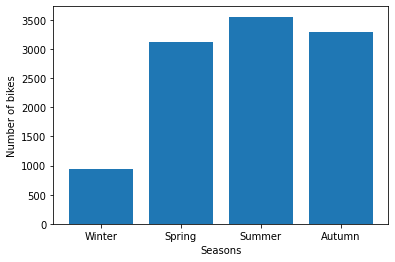

In [9]:
plt.bar(train_df['Seasons'], train_df['y'])
plt.xlabel('Seasons')
plt.ylabel('Number of bikes')
plt.show()

In [10]:
len(train_df['Hour'])

5760

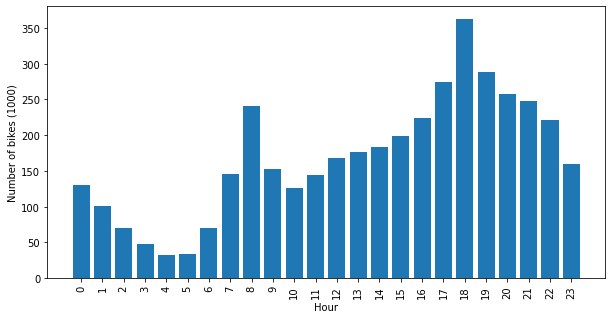

In [11]:
plt.figure(figsize = [10, 5])

y = list(train_df.groupby('Hour')['y'].sum()/1000)

plt.bar(range(24) , y)
plt.xticks(range(24), rotation=90)
plt.xlabel('Hour')
plt.ylabel('Number of bikes (1000)')
plt.show()

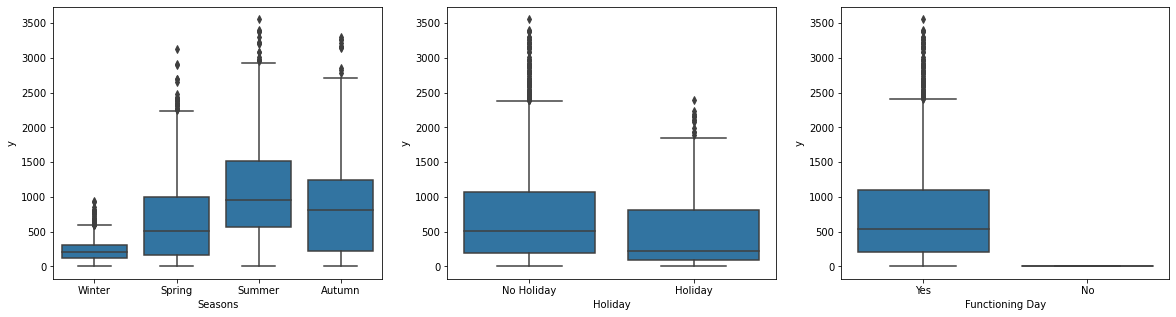

In [12]:
# Box plots to check outliers existence

plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]
 
plt.subplot(1, 3, 1)
# plot Seasons VS y
_ = sns.boxplot(data=train_df, x='Seasons', y='y', color=base_color)

plt.subplot(1, 3, 2)
# plot Holiday VS y
_ = sns.boxplot(data=train_df, x='Holiday', y='y', color=base_color)

plt.subplot(1, 3, 3)
# Functioning Day VS y
_ = sns.boxplot(data=train_df, x='Functioning Day', y='y', color=base_color)

#### Conclusion from the previeus visualization We got many outliers in both 'Season' and 'Holiday' features.

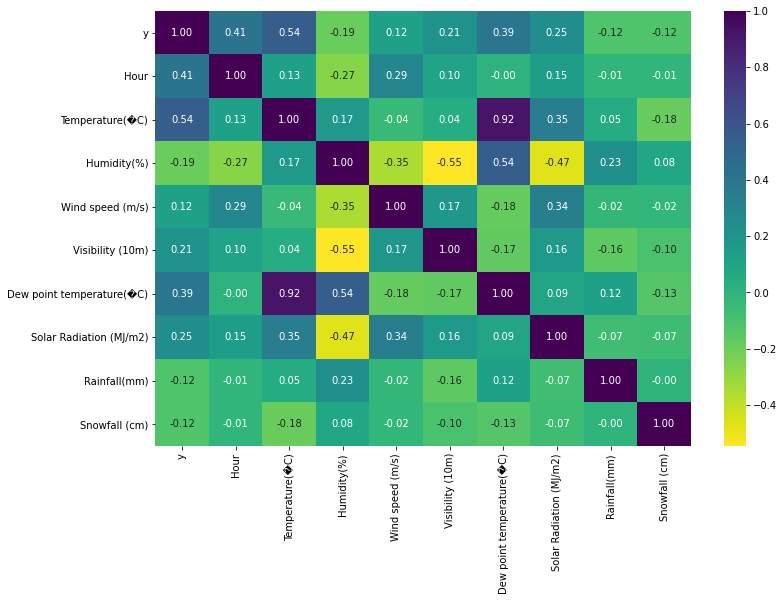

In [13]:
df_for_plot = train_df.iloc[:, 2:12]
plt.figure(figsize = [12, 8])
sns.heatmap(df_for_plot.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

#### Here we can notice that the 'Hour', 'Tempereture' and 'Dew point temperature' have the heighst correlation with 'y'.

### 3D Correlation 

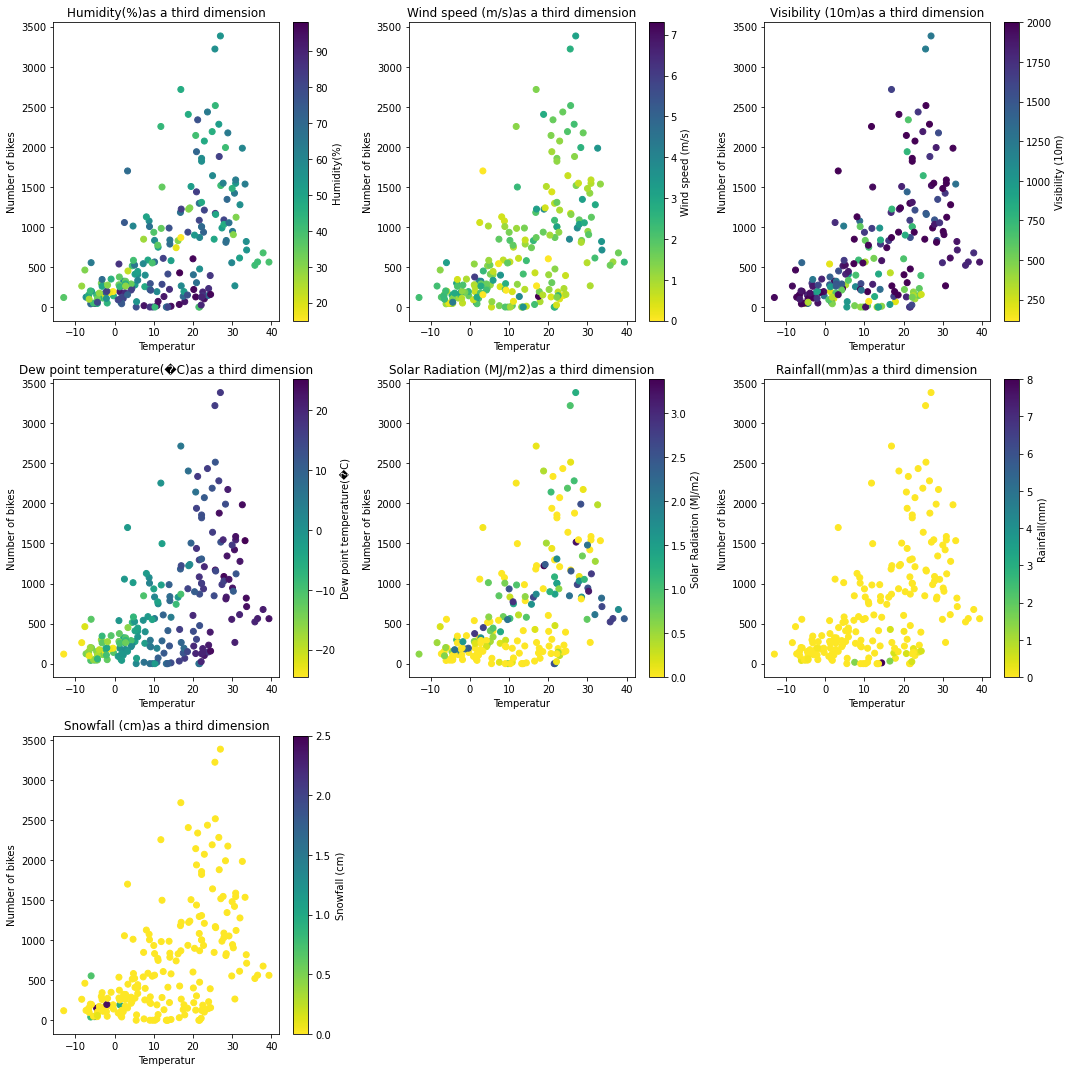

In [14]:
cols = train_df.columns[5:12]
samples = np.random.choice(train_df.shape[0], 200, replace = False)
diamonds_samp = df_for_plot.loc[samples,:]
plt.figure(figsize = [15, 15],  tight_layout = 5)

for i in range(len(cols)):
    plt.subplot(3, 3, i+1)
    plt.scatter(data = diamonds_samp, x = 'Temperature(�C)', y = 'y', c = cols[i], cmap = 'viridis_r')
    plt.colorbar(label = cols[i])
    plt.xlabel('Temperatur')
    plt.ylabel('Number of bikes')
    plt.title(cols[i] + 'as a third dimension')